In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Function to generate an array of random integers
def generate_random_array(data_length):
    return np.random.randint(0, 100, data_length)

# Function to plot the data and the line
def plot_data_with_line(arr, slope, y_intercept):
    x = np.arange(len(arr))
    y = arr
    
    plt.scatter(x, y, color='red', label='Brick Column Tops')
    plt.plot(x, slope * x + y_intercept, color='blue', label='Board')
    
    plt.xlabel('Brick Column')
    plt.ylabel('Brick Height')
    plt.title('Brick Tops and Board')
    plt.show()
    

In [4]:
import random

def calculate_slope_intercept(arr):
    if len(arr) < 2:
        raise ValueError("Array must have at least two elements")
        
    errored = True
    attempts = 0
    error_margin = 0.0000000000001
    while (errored):
    
        attempts += 1

        if (attempts > 1000000):
            print("I almost had it")
            break
        
        errored = False
        
        first_index = random.randrange(len(arr))
        second_index = random.randrange(len(arr))
    
        while(first_index == second_index):   
            second_index = random.randrange(len(arr))
        
        x1, y1 = (first_index, arr[first_index])
        x2, y2 = (second_index, arr[second_index])

        slope = (y2 - y1) / (x2 - x1)
        y_intercept = y1 - slope * x1
    
        left_touch = False
        right_touch = False
        # Make sure all the points in arr are on or beneath the line
        for x, y in enumerate(arr):
            if y > slope * x + y_intercept + error_margin:
                errored = True
                break
                
            # Set touch to True if we find a point on the line
            if y > slope * x + y_intercept - error_margin:
                if x < len(arr) / 2:
                    left_touch = True
                else:
                    right_touch = True
        if not errored and not (left_touch and right_touch):
            errored = True


    return slope, y_intercept #, attempts

    

In [22]:
def print_fail(num, arr, slope, y_intercept, err):
    print(f"Test {num + 1} failed!")
    print(err)
    plot_data_with_line(arr, slope, y_intercept)
    print("Data:", json.dumps(arr.tolist()))
    print("Slope:", slope)
    print("Y-Intercept:", y_intercept)

errored = False
error_margin = 0.0000000000001
attempts = 0
for i in range(0, 1000):
    arr = generate_random_array(30)
    slope, y_intercept, attempts = calculate_slope_intercept(arr)
    left_touch = False
    right_touch = False
    # Make sure all the points in arr are on or beneath the line
    for x, y in enumerate(arr):
        if y > slope * x + y_intercept + error_margin:
            print_fail(i, arr, slope, y_intercept, f"Point ({x},{y}) is above the line")
            errored = True
            break
        # Set touch to True if we find a point on the line
        if y > slope * x + y_intercept - error_margin:
            if x < len(arr) / 2:
                left_touch = True
            else:
                right_touch = True
    if not errored and not (left_touch and right_touch):
        print_fail(i, arr, slope, y_intercept, "The board is defying gravity!")
        errored = True
    if errored: break

    if not i % 100:
        print(f"Test {i+1} complete after {attempts} attempts.")

if not errored: print("All tests passed!")

Test 1 complete after 48 attempts.
Test 101 complete after 15 attempts.
Test 201 complete after 113 attempts.
Test 301 complete after 947 attempts.
Test 401 complete after 100 attempts.
Test 501 complete after 280 attempts.
Test 601 complete after 1132 attempts.
Test 701 complete after 197 attempts.
Test 801 complete after 17 attempts.
Test 901 complete after 342 attempts.
All tests passed!


Text(0, 0.5, 'Time Taken')

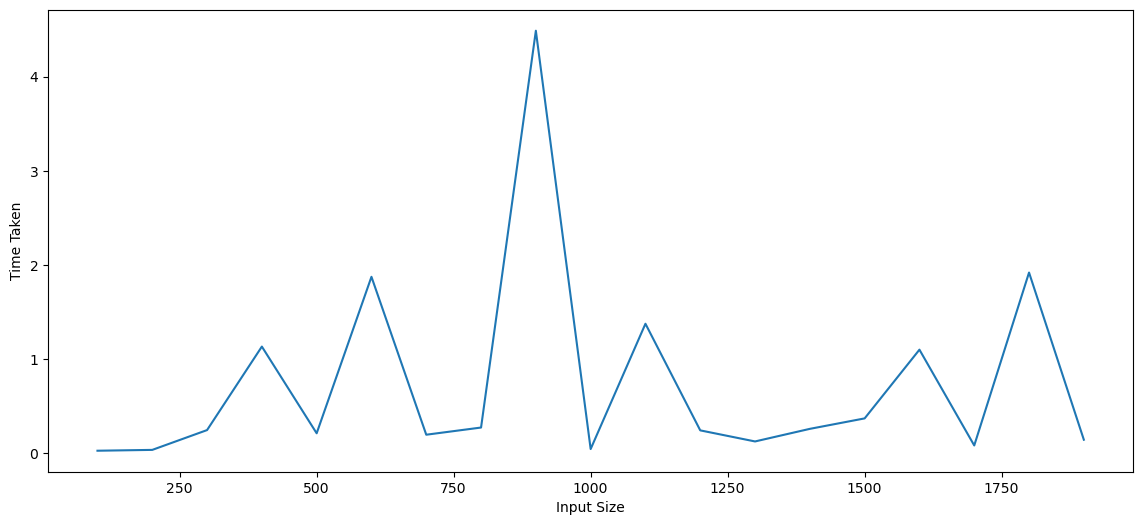

In [6]:
import time

input_sizes = range(100, 2000, 100)
samples = 1
times = []
for n in input_sizes:
    total = 0
    for j in range(samples):
        start_time = time.time()
        random_array = generate_random_array(n)
        slope, y_intercept = calculate_slope_intercept(random_array)
        end_time = time.time()
        total += (end_time - start_time)
    times.append(total / samples)

plt.figure(figsize=(14, 6))
plt.plot(input_sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Time Taken')